In [1]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
url = 'https://min-api.cryptocompare.com/data/histominute' +\
        '?fsym=BTC' +\
        '&tsym=USD' +\
        '&limit=2000' +\
        '&aggregate=1'
response = requests.get(url)
data = response.json()['Data']

df = pd.DataFrame(data)
df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]

In [3]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1622094660,38151.78,38097.31,38150.97,589.66,22473955.47,38113.41,invert_divide,ETH,2021-05-27 05:51:00
1,1622094720,38140.21,38115.52,38135.01,24.57,936868.45,38136.00,direct,,2021-05-27 05:52:00
2,1622094780,38228.97,38109.51,38136.00,40.62,1549501.45,38227.65,direct,,2021-05-27 05:53:00
3,1622094840,38229.43,38152.56,38227.65,37.92,1448266.99,38204.59,direct,,2021-05-27 05:54:00
4,1622094900,38204.56,38117.39,38201.48,492.62,18779802.04,38122.29,invert_divide,ETH,2021-05-27 05:55:00
...,...,...,...,...,...,...,...,...,...,...
1996,1622214420,36665.62,36601.70,36601.70,42.77,1567526.37,36642.50,direct,,2021-05-28 15:07:00
1997,1622214480,36716.56,36642.50,36642.50,42.53,1561574.65,36711.98,direct,,2021-05-28 15:08:00
1998,1622214540,36715.53,36674.62,36711.98,37.06,1359982.11,36701.78,direct,,2021-05-28 15:09:00
1999,1622214600,36711.95,36683.99,36701.78,25.25,926687.79,36706.51,direct,,2021-05-28 15:10:00


In [4]:
df.describe()

,time,high,low,open,volumefrom,volumeto,close
count,2.001000e+03,2001.000000,2001.000000,2001.000000,2001.000000,2.001000e+03,2001.000000
mean,1.622155e+09,38197.729805,38129.627726,38162.733933,69.603004,2.629361e+06,38162.012844
std,3.466700e+04,1230.404424,1241.124128,1235.714581,235.828936,8.790492e+06,1236.086672
min,1.622095e+09,35249.550000,35146.440000,35149.410000,0.000000,0.000000e+00,35149.410000
25%,1.622125e+09,37039.950000,36946.760000,37002.830000,18.310000,7.023175e+05,37002.680000
50%,1.622155e+09,38357.330000,38297.530000,38324.270000,29.980000,1.145010e+06,38325.000000
75%,1.622185e+09,39124.720000,39069.290000,39098.400000,52.900000,1.986021e+06,39098.400000
max,1.622215e+09,40408.950000,40317.180000,40365.290000,5892.300000,2.104329e+08,40365.290000


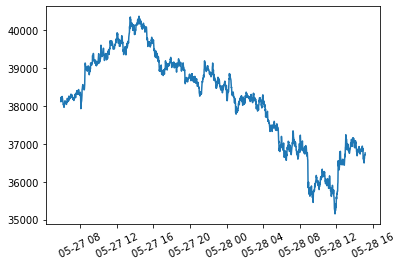

In [5]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=25)
plt.show()

### Plot candlesticks

In [88]:
import mplfinance as mpf

In [155]:
df2 = df.rename(columns={"timestamp": "Date", "open": "Open", "high": "High", "low": "Low", "close": "Close", "volumefrom": "Volume"})
df2 = df2[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df2.set_index('Date', inplace=True)

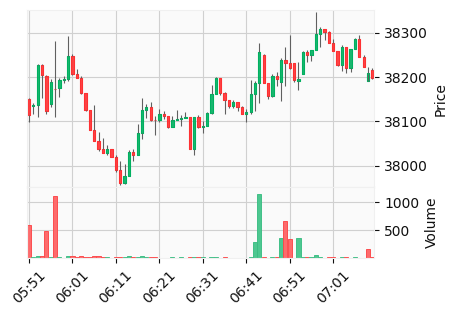

In [186]:
mpf.plot(df2[:80],
         type='candle',
         figscale=0.5,
         volume=True,
         style='yahoo',
         tight_layout=True)

### Plot lines and special marks

In [219]:
lines = [
            (str(df2.index[10]),df2['Close'][10]), 
            (str(df2.index[70]),df2['Close'][70])
        ]

In [316]:
def markersAt(df, dates):
    import numpy as np
    markers = []
    for date, value in df.T.iteritems():
        if date in dates:
            markers.append(value["High"]*1.001)
        else:
            markers.append(np.nan)
    return markers

dates1 = [df2.index[10], df2.index[30], df2.index[70]]
markers1 = markersAt(df2[:80], dates1)

dates2 = [df2.index[15], df2.index[20], df2.index[25]]
markers2 = markersAt(df2[:80], dates2)

other_plots = [
        mpf.make_addplot(df2[:80][['Close']], panel=0, linestyle='dashed', width=1),
        mpf.make_addplot(df2[:80][['Open']], panel=1, linestyle='solid', width=1, secondary_y=True),
        mpf.make_addplot(df2[:80][['High']], panel=2, linestyle='dotted', width=1, ylabel='TEST', color=('r')),
        mpf.make_addplot(markers1,type='scatter',markersize=200,marker='v'),
        mpf.make_addplot(markers2,type='scatter',markersize=100,marker='$\u2665$')
       ]

vlines=[str(df2.index[24]),
     str(df2.index[42])]

tdates = [(df2.index[30],df2.index[60])]

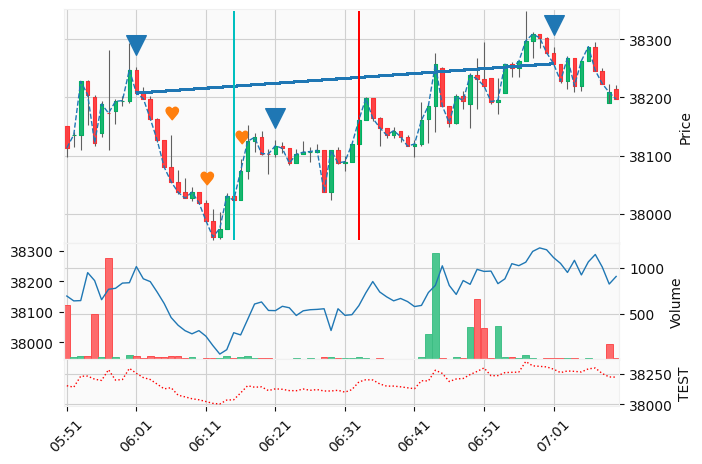

In [317]:
#valid_types = ('line','scatter','bar', 'ohlc', 'candle')

mpf.plot(df2[:80],
         type='candle',
         figscale=0.8,
         volume=True,
         style='yahoo',
         addplot=other_plots,
         alines=lines,
         vlines=dict(vlines=vlines,colors=('c','r'),linewidths=0.1),
#          tlines=[
#             dict(tlines=tdates,tline_use=['Low'],tline_method='least-squares',colors='b'),
#             dict(tlines=tdates,tline_use=['Low'],tline_method='point-to-point',colors='g')
#          ],
         tight_layout=True,
         panel_ratios=(10,5,2)
        )
#          mav=(20,50,200))

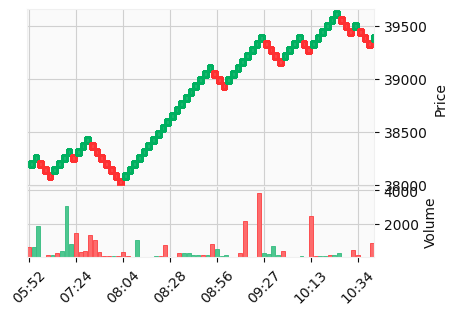

In [259]:
mpf.plot(df2[:300],figscale=0.5,type='renko',volume=True,style='yahoo', tight_layout=True)

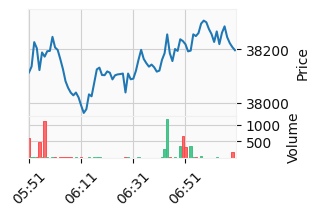

In [180]:
mpf.plot(df2[:80],figscale=0.3,type='line',volume=True,style='yahoo', tight_layout=True)